In [23]:
!pip install PyWavelets

import numpy as np
import pandas as pd
import pywt
import pickle
import matplotlib.pyplot as plt

The dictionary with the dataframes took a long time to create, so it was saved in a pickle file

In [5]:
with open('DictAreas.pickle', 'rb') as f:
    DictAreas = pickle.load(f)

In [8]:
DictAreas['S0098']

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
"(-100, 0]",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(0, 100]",0.624237,0.954893,0.406898,0.403948,0.0,0.086680,0.009834,0.003911,0.007733,0.003077,...,0.001725,0.002068,0.002224,0.002475,0.002252,0.002116,0.002535,0.002230,0.001850,0.002108
"(100, 200]",1.706573,2.127689,1.381716,0.922694,0.0,0.144597,0.014000,0.006107,0.011214,0.004147,...,0.002499,0.003057,0.002785,0.003029,0.003008,0.003384,0.003002,0.003501,0.002896,0.003332
"(200, 300]",1.248612,1.554683,1.035715,0.792509,0.0,0.149333,0.015671,0.004790,0.011646,0.004482,...,0.003192,0.005214,0.004536,0.003301,0.002878,0.003784,0.004029,0.003822,0.003202,0.002890
"(300, 400]",0.994633,1.234387,0.768286,0.710481,0.0,0.143601,0.014926,0.005271,0.010334,0.004097,...,0.002477,0.005241,0.004422,0.003303,0.002681,0.003287,0.003798,0.003678,0.003323,0.002973
"(400, 500]",1.174713,1.331238,0.826809,0.649631,0.0,0.128793,0.014076,0.005904,0.011549,0.004164,...,0.002678,0.003848,0.003028,0.003383,0.003050,0.003647,0.003454,0.003671,0.002888,0.002932
"(500, 600]",1.111525,1.333186,0.894450,0.659817,0.0,0.156769,0.016068,0.004851,0.011885,0.003811,...,0.002539,0.003475,0.002825,0.003445,0.002796,0.003001,0.003035,0.003587,0.002819,0.002655
"(600, 700]",1.683059,1.965589,1.351126,0.714351,0.0,0.174231,0.015812,0.005004,0.011827,0.004497,...,0.003074,0.003126,0.003042,0.003561,0.002720,0.003437,0.003657,0.003247,0.002654,0.002887
"(700, 800]",2.114132,2.558372,1.895267,0.773789,0.0,0.183407,0.017898,0.005943,0.011514,0.005077,...,0.003036,0.003290,0.003144,0.003207,0.003158,0.003405,0.003670,0.003729,0.003240,0.002760
"(800, 900]",1.142619,1.369830,1.004559,0.526787,0.0,0.142635,0.013624,0.005651,0.011437,0.003743,...,0.002292,0.003650,0.002820,0.003026,0.003585,0.003493,0.003619,0.003634,0.002296,0.002971


In [14]:
with open('train_files.pickle','rb') as f:
    train_files = pickle.load(f)

In [51]:
samples_list = list(train_files.keys())

### The preprocessing function  

Detailed explanation is in the EDA file

In [17]:
from sklearn.preprocessing import minmax_scale

def drop_non_int_and_He(df):
    df2 = df
    df2 = df2[df2['m/z'].transform(round) == df2['m/z']]
    df2 = df2[df2['m/z']<100]
    df2 = df2[df2['m/z'] != 4]
    return df2

def subtract_min(df):    

    df["abundance_minsub"] = df.groupby(["m/z"])["abundance"].transform(
        lambda x: (x - x.min())
    )
    return df

def scale_to_zero_one(df):
    df['zero_one_rescale'] = minmax_scale(df['abundance_minsub'])
    assert (df['zero_one_rescale'].max()<=1)
    return df
    

def preprocess(df):
    return scale_to_zero_one(subtract_min(drop_non_int_and_He(df)))

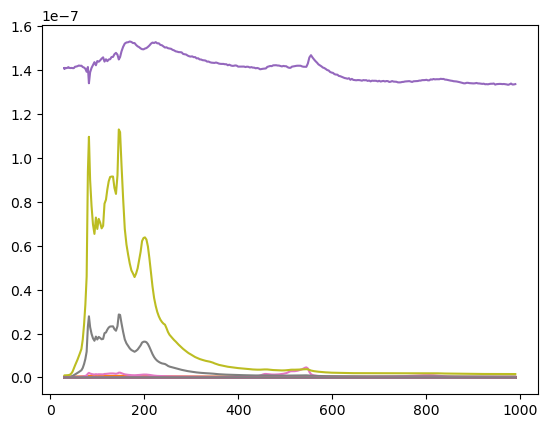

In [ ]:

df = pd.read_csv(train_files['S0002'])
df_mod = preprocess(df)

num_curves = 100
domain = df[df['m/z'] == 0].temp # choose one of the m/z, doesn't matter which
curves = [df[df['m/z'] == mz].abundance for mz in range(0,28)] # We will rescale the curves to make the horizontal variable be in the range (0,100)




# Parameters for wavelet decomposition
wavelet = 'db4'  # Daubechies wavelet (e.g., db4)
max_level = 4    # Maximum level of decomposition

# Decompose each curve into wavelet coefficients
wavelet_coeffs = []
for curve in curves:
    coeffs = pywt.wavedec(curve, wavelet, level=max_level)
    # print(len(coeffs))
    wavelet_coeffs.append(coeffs)

# Reconstruct the curves from coefficients (optional, for validation)
reconstructed_curves = [pywt.waverec(coeffs, wavelet) for coeffs in wavelet_coeffs]

# Graphing the reconstructed curves to see that the approximations are quite close to the true curves.  So we only need to st
for mz in range(0,28):
    plt.plot(domain, reconstructed_curves[mz][:len(curves[mz])])

We attempt to do the above for all samples

In [223]:

# Parameters for wavelet decomposition
wavelet = 'db4'  # Daubechies wavelet (e.g., db4)
max_level = 4    # Maximum level of decomposition

# We will make a list, each element of which is a list with wavelet coefficients. Later we will turn it into a dataframe

WaveletCoefs = []

# Now we iterate through the list of samples

for sample in samples_list:

    df = pd.read_csv(train_files[sample])
    df_mod = preprocess(df)

    # in the preprocessed file there are no more than 99 curves (99, and m/z = 4 is excluded)

    num_curves = 99

    # The following stores the curves on which the wavelet decomposition is performed, one curve for each m/z. The number of measurements is not the same for all 
    # samples, resulting in irregularities in the 

    curves = []

    for mz in range(num_curves):       
        
        curve = np.linspace(0,99,100)      
        
        # This scales each graph horizontally
        
        if len(df_mod[df_mod['m/z'] == mz].zero_one_rescale)>0:
            for i in [n for n in range(100) if n != 4]:
                curve[i]=df_mod[df_mod['m/z'] == mz].zero_one_rescale.iloc[int(i*len(df_mod[df_mod['m/z'] == mz].zero_one_rescale)/100)]

        curves.append(curve)

    

    # Decompose each curve into wavelet coefficients
    wavelet_coeffs = np.array([])
    for curve in curves:

        # create wavelet coefficients for each curve. This will be a list of lists.
        
        coeffs = pywt.wavedec(curve, wavelet, level=max_level)

        # add them to a long list

        concatenated_coeffs = np.concatenate([c.flatten() for c in coeffs])      
              
        wavelet_coeffs = np.concatenate((wavelet_coeffs,concatenated_coeffs)) 
    

    
    WaveletCoefs.append(list(wavelet_coeffs))





/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [226]:
WaveletCoefsDF = pd.DataFrame(WaveletCoefs)
WaveletCoefsDF 

,0,1,2,3,4,5,6,7,8,9,...,12365,12366,12367,12368,12369,12370,12371,12372,12373,12374
0,2.516801,2.715678,2.129423,2.436507,2.981288,1.212807,0.009721,0.002360,0.004272,0.001176,...,7.059667e-07,-6.082467e-08,8.333430e-09,-5.413403e-07,6.817386e-07,1.931581e-07,4.775041e-07,-1.815845e-07,-4.417973e-07,-2.938355e-07
1,9.175946,8.970593,8.070287,9.781137,4.751016,23.063488,84.323558,148.330615,212.410415,275.675579,...,5.079270e-15,1.630640e-16,1.020017e-15,2.654127e-15,5.287437e-15,-1.960238e-15,-6.591949e-16,-2.371313e-02,-4.096209e-02,6.467522e-02
2,2.517206,2.716005,2.129764,2.437141,2.980280,1.217392,0.004848,0.002060,0.001569,0.000490,...,1.766482e-08,-2.267159e-08,-1.897691e-07,-1.733340e-07,9.576025e-08,2.864218e-07,-1.500328e-07,5.444218e-08,3.836631e-08,-3.322976e-07
3,2.517685,2.716503,2.130253,2.437595,2.981029,1.216861,0.004120,0.002390,0.002131,0.001131,...,-6.867785e-07,-1.861811e-06,-3.948301e-07,4.599317e-07,7.090541e-07,5.677219e-07,-4.264530e-07,1.840017e-07,1.305097e-07,-7.860168e-07
4,2.525737,2.724276,2.138315,2.446109,2.985617,1.236905,0.029325,0.020626,0.004548,0.001494,...,-7.608696e-07,-1.426719e-06,-3.063755e-08,-1.151671e-06,-5.047254e-07,-8.040272e-07,-5.248423e-07,1.673426e-07,7.403844e-07,6.886549e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2.621651,2.818639,2.237310,2.541491,3.083334,1.324747,0.115981,0.114969,0.105785,0.086786,...,-7.006251e-07,-8.166051e-05,9.641546e-06,-1.076886e-04,9.016202e-06,-1.173315e-04,-4.069105e-05,9.676483e-06,6.993491e-05,9.978190e-05
750,2.522125,2.720739,2.134409,2.442387,2.983388,1.227556,0.021090,0.023611,0.048803,0.072290,...,3.178740e-06,-6.871119e-06,-5.492084e-07,2.575223e-06,-6.418784e-06,2.083643e-06,-9.040851e-07,2.410919e-07,3.145630e-07,-2.412107e-07
751,9.175946,8.970593,8.070287,9.781137,4.751016,23.063488,84.323558,148.330615,212.410415,275.675579,...,5.079270e-15,1.630640e-16,1.020017e-15,2.654127e-15,5.287437e-15,-1.960238e-15,-6.591949e-16,-2.371313e-02,-4.096209e-02,6.467522e-02
752,2.540351,2.738696,2.153801,2.460274,3.003376,1.240136,0.077472,0.035163,0.008726,0.009327,...,2.961352e-07,2.474143e-07,5.847812e-07,2.515991e-07,-1.255192e-06,-3.542037e-07,-3.314920e-06,1.124957e-06,3.025902e-06,-1.681107e-07


Text(0, 0.5, 'cumulative explained variance')

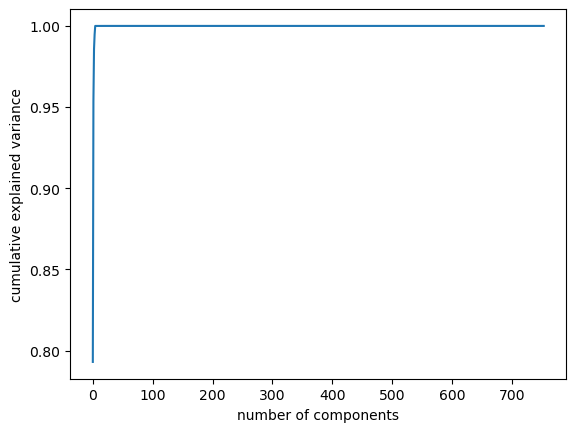

In [227]:
# import PCA
from sklearn.decomposition import PCA



# Fit and make plot of explained variance ratio
principal_components = PCA().fit(WaveletCoefsDF )

# pca = PCA().fit(digits.data)
plt.plot(np.cumsum(principal_components.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


<Axes: >

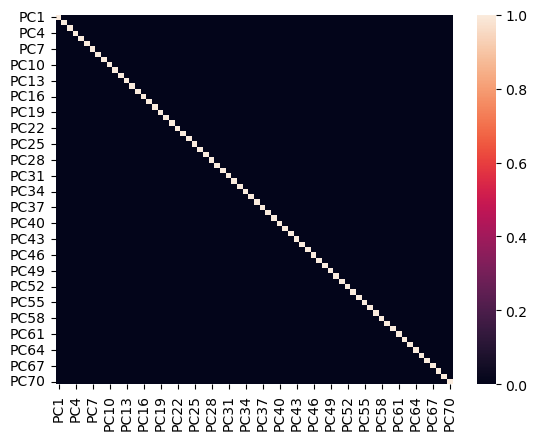

In [232]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
import seaborn as sns

pc_number = 70

#Test the PCA with 3 components on the above dataframe
scaler = StandardScaler() 
scaled_data = pd.DataFrame(scaler.fit_transform(WaveletCoefsDF)) #scaling the data

pca = PCA(n_components = pc_number)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

columns = []
for i in range(1,pc_number+1):
    columns.append('PC'+str(i))

data_pca = pd.DataFrame(data_pca,columns=columns)
    
sns.heatmap(data_pca.corr())
#data_pca

In [229]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.016372,-11.876991,4.032665,0.205352,-0.189309,-0.995136,0.739145,-0.384591,1.481607,-0.031033
1,1.551834,138.626501,-85.162683,91.158230,2.438445,-0.275179,-0.580423,-0.272021,0.862876,-0.239440
2,3.041944,-11.893157,4.206166,0.161334,0.007709,-1.055125,0.491744,-0.207175,1.891125,0.580264
3,3.076574,-11.962228,4.155007,0.239936,-0.294009,-0.605075,0.994630,-0.183628,1.642949,-0.512841
4,2.994138,-11.923699,4.154875,0.183905,-0.165532,-0.951886,0.493916,-0.214835,1.578879,-0.202020
...,...,...,...,...,...,...,...,...,...,...
749,2.878997,-11.791049,4.434757,0.126858,0.170918,-1.183308,-0.443607,1.388223,0.633601,-0.629038
750,2.836782,-11.986203,3.909474,0.044376,-0.430506,-1.753361,0.738827,-0.797086,1.467461,0.166410
751,1.283805,138.656447,-85.474871,91.315539,2.336738,0.298811,-0.801736,-0.497219,1.233772,-0.116377
752,2.992089,-11.881164,4.063128,0.175929,-0.216036,-0.849793,0.689827,-0.454939,1.276342,-0.044451
